# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata,  on = 'Mouse ID')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
unique_mice = mouse_study_df['Mouse ID'].nunique()
unique_mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates_df = mouse_study_df[mouse_study_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_study_df[mouse_study_df['Mouse ID'] !='g989']
clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = clean_mouse_df['Mouse ID'].nunique()
unique_mice_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

Mouse_summary_df = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
Mouse_summary_df.index.name = 'Drug Regimen'
Mouse_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Mouse_summary_df = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
Mouse_summary_df.index.name = 'Drug Regimen'
Mouse_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

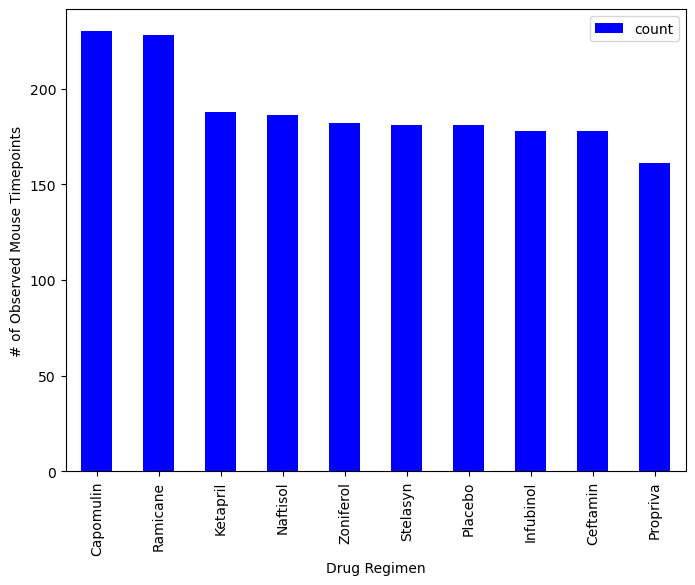

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = mouse_study_df['Drug Regimen'].value_counts()
drug_count_df = drug_count.reset_index()
drug_count_df.columns = ['Drug Regimen', 'count']
drug_count_df.set_index('Drug Regimen')

figure1 = drug_count_df.plot(kind="bar", color="blue", figsize=(8,6), xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
xticklabels = drug_count_df['Drug Regimen']
figure1.set_xticklabels(xticklabels)
plt.show()

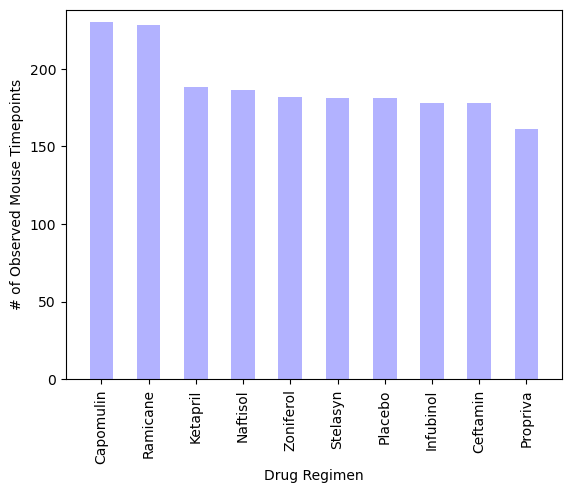

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_count_df['Drug Regimen'], drug_count_df['count'], color='b', alpha=0.3, align="center", width=0.5)
plt.xticks(rotation=90)
plt.xlim(-0.75, len(drug_count_df['count'])-0.25)
plt.ylim(0, max(drug_count_df['count'])+8)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

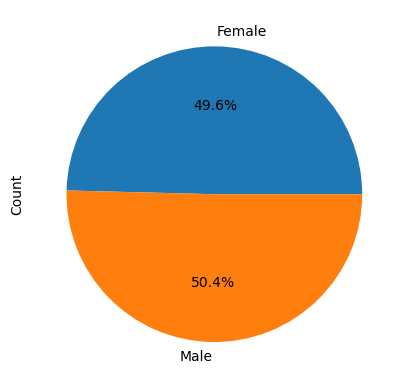

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_count=clean_mouse_df.groupby('Sex')['Mouse ID'].nunique().reset_index()
gender_count.columns = ['Sex', 'Count']
gender_count
gender_count.set_index('Sex')

# Make the pie chart
gender_count['Count'].plot(kind='pie', autopct='%1.1f%%', startangle=0, labels=gender_count['Sex'])
plt.show()

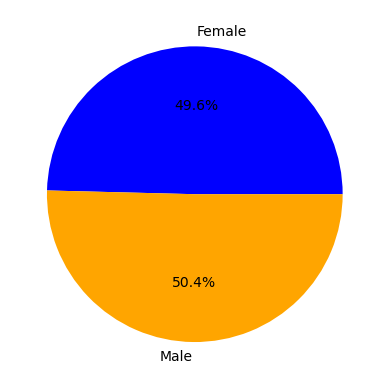

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_count=clean_mouse_df.groupby('Sex')['Mouse ID'].nunique().reset_index()
gender_count.columns = ['Sex', 'Count']
gender_count_df=pd.DataFrame(gender_count)
gender_count_df.set_index('Sex')

# Make the pie chart
colors = ["blue", "orange"]
explode = (0, 0)
plt.pie(gender_count_df['Count'], explode=explode, labels=gender_count_df['Sex'], colors=colors,
        autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Tumor_end_time = clean_mouse_df.groupby('Mouse ID', as_index=False)['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Tumor_end_time_merge = pd.merge(Tumor_end_time, clean_mouse_df,  on = ['Mouse ID', 'Timepoint'])
Tumor_end_time_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Tumor_end_time_merge=pd.merge(Tumor_end_time, clean_mouse_df,  on=['Mouse ID', 'Timepoint'])
Tumor_end_time_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#treatments=pd.DataFrame(treatments)
treatments

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [18]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume={drug:[] for drug in treatments}

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in Tumor_end_time_merge.iterrows():
    if row['Drug Regimen'] in treatments:
        tumor_volume[row['Drug Regimen']].append(row['Tumor Volume (mm3)'])

#Capomulin
Cap_series=pd.Series(tumor_volume['Capomulin'])
Q1_Cap=Cap_series.quantile(0.25)
Q3_Cap=Cap_series.quantile(0.75)
IQR_Cap=Q3_Cap-Q1_Cap

lower_bound_Cap = Q1_Cap - (1.5*IQR_Cap)
upper_bound_Cap = Q3_Cap + (1.5*IQR_Cap)
    # Determine outliers using upper and lower bounds
for number in Cap_series:
    if number< lower_bound_Cap:
        print(f"{number} is an outlier")
else:
        print("There is no other lower outlier for Capomulin")
for number in Cap_series:
    if number> upper_bound_Cap:
        print(f"{number} is an outlier")
else:
        print("There is no other upper outlier for Capomulin")

    
#Ramicane
Ram_series=pd.Series(tumor_volume['Ramicane'])
Q1_Ram=Ram_series.quantile(0.25)
Q3_Ram=Ram_series.quantile(0.75)
IQR_Ram=Q3_Ram-Q1_Ram

lower_bound_Ram = Q1_Ram - (1.5*IQR_Ram)
upper_bound_Ram = Q3_Ram + (1.5*IQR_Ram)
    # Determine outliers using upper and lower bounds
for number in Ram_series:
    if number< lower_bound_Ram:
        print(f"{number} is an outlier")
else:
        print("There is no other lower outlier for Ramicane")
for number in Ram_series:
    if number> upper_bound_Ram:
        print(f"{number} is an outlier")
else:
        print("There is no other upper outlier for Ramicane")

#Infubinol
Inf_series=pd.Series(tumor_volume['Infubinol'])
Q1_Inf=Inf_series.quantile(0.25)
Q3_Inf=Inf_series.quantile(0.75)
IQR_Inf=Q3_Inf-Q1_Inf

lower_bound_Inf = Q1_Inf - (1.5*IQR_Inf)
upper_bound_Inf = Q3_Inf + (1.5*IQR_Inf)
    # Determine outliers using upper and lower bounds
for number in Inf_series:
    if number< lower_bound_Inf:
        print(f"{number} is an outlier in Infubinol data")
else:
        print("There is no other lower outlier for Infubinol")
for number in Inf_series:
    if number> upper_bound_Inf:
        print(f"{number} is an outlier")
else:
        print("There is no other upper outlier for Infubinol")

#Ceftamin
Cef_series=pd.Series(tumor_volume['Ceftamin'])
Q1_Cef=Cef_series.quantile(0.25)
Q3_Cef=Cef_series.quantile(0.75)
IQR_Cef=Q3_Cef-Q1_Cef

lower_bound_Cef = Q1_Cef - (1.5*IQR_Cef)
upper_bound_Cef = Q3_Cef + (1.5*IQR_Cef)
    # Determine outliers using upper and lower bounds
for number in Cef_series:
    if number< lower_bound_Cef:
        print(f"{number} is an outlier in Ceftamin data")
else:
        print("There is no other lower outlier for Ceftamin")
for number in Cef_series:
    if number> upper_bound_Cef:
        print(f"{number} is an outlier")
else:
        print("There is no other upper outlier for Ceftamin")

There is no other lower outlier for Capomulin
There is no other upper outlier for Capomulin
There is no other lower outlier for Ramicane
There is no other upper outlier for Ramicane
36.3213458 is an outlier in Infubinol data
There is no other lower outlier for Infubinol
There is no other upper outlier for Infubinol
There is no other lower outlier for Ceftamin
There is no other upper outlier for Ceftamin


## Line and Scatter Plots

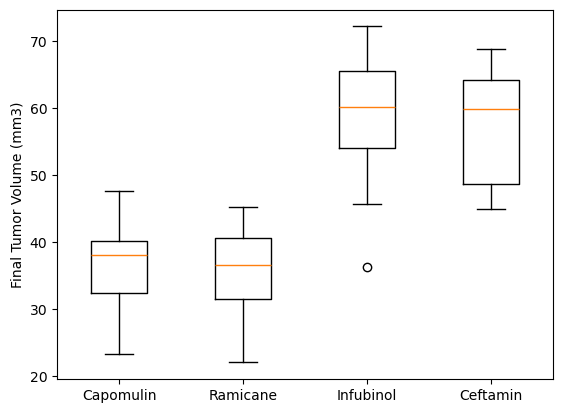

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot([tumor_volume['Capomulin'], tumor_volume['Ramicane'], tumor_volume['Infubinol'], tumor_volume['Ceftamin']], 
            tick_labels = ['Capomulin', 'Ramicane','Infubinol', 'Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

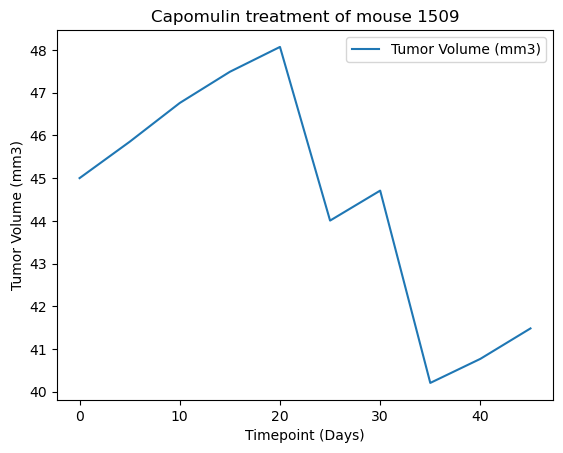

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Mouse_l509=clean_mouse_df[clean_mouse_df['Mouse ID'] =='l509']

Mouse_l509.plot(x='Timepoint', y='Tumor Volume (mm3)', kind = 'line')
plt.title('Capomulin treatment of mouse 1509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (Days)')
plt.show()

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Create a DataFrame of just the Capomulin Mice
Capomulin_regimen=clean_mouse_df[clean_mouse_df['Drug Regimen'] =='Capomulin']
Capomulin_regimen

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [24]:
#Create a new DataFrame with the average Tumor Volume of each mouse
Average_Tumor_df=Capomulin_regimen.groupby('Mouse ID', as_index=False)['Tumor Volume (mm3)'].mean()
Average_Tumor_df.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'}, inplace=True)
#Get the Mouse Weight and merge it into the DataFrame
Get_weight=Capomulin_regimen.groupby('Mouse ID', as_index=False)['Weight (g)'].mean()
Average_weight2_df=pd.merge(Average_Tumor_df,Get_weight, on='Mouse ID')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


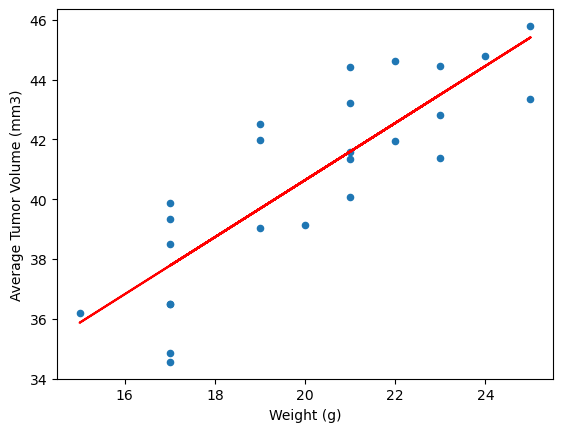

In [25]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = Average_weight2_df['Weight (g)']
y_values = Average_weight2_df['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+"x +"+str(round(intercept,2))
Average_weight2_df.plot(kind='scatter', x='Weight (g)', y='Average Tumor Volume (mm3)')
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print("The correlation between mouse weight and the average tumor volume is", round(rvalue,2))

plt.show()